In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [284]:
#!/usr/bin/python3

import pickle
import seaborn

class ValueIteration:

    def __init__(self, ph = .4, win_state = 100):
        # state is the amount of money held by the player
        self.win_state = win_state
        # value of each state is the probability of winning with that much money
        self.V = [0 for _ in range(win_state + 1)] # also account for state=0
        # once player reaches 100, the win is definite
        #self.V[-1] = 1

        # policy is the best action to take
        self.P = [0 for _ in range(win_state+1)]
        self.ph = ph

    def possible_actions(self, s):
        values = []
        # action is the value of the bet; it can go from 1 to s
        actions = list(range(0, min(s, self.win_state-s)+1))
        for a in actions:
            new_state_value = 0
            
            # lose
            next_state = max(0, s-a)
            reward = 0
            new_state_value += (1-self.ph) * (reward + self.V[next_state])

            # win
            next_state = min(100, s+a)
            reward = 1 if s+a >= self.win_state else 0
            new_state_value += self.ph * (reward + self.V[next_state])
            
            values.append(new_state_value)
        return values
    
    def best_action(self, s):
        best_actions, best_value = self.best_actions(s)
        #return random.choice(best_actions), best_value
        # if only one choice
        if len(best_actions) == 1:
            return best_actions[0], best_value
        # if two choices, don't pick action zero
        if len(best_actions) == 2:
            if best_actions[0] == 0:
                return best_actions[1], best_value
            else:
                return best_actions[0], best_value
        # if multiple actions, don't pick zero nor the last one
        return best_actions[1], best_value
            
    def best_actions(self, s, eps=1e-9):
        values = self.possible_actions(s)
        best_value = max(values)
        return list(map(lambda x: x[0], filter(lambda x: abs(x[1]-best_value) < eps, enumerate(values)))), best_value
    
    # s is the state: amount of money held
    def updateV(self, s):
        best_action, best_value = self.best_action(s)
        
        delta = abs(self.V[s]-best_value)
        self.V[s] = best_value
        self.P[s] = best_action

        return delta

    def updateS(self):
        delta = 0
        states = list(range(1, self.win_state))
        #random.shuffle(states)
        for s in states:
            delta = max(delta, self.updateV(s))
        return delta

    def loop(self, stop_delta=.000001, stop_iterations=100000):
        ans = []
        for i in range(stop_iterations):
            delta = self.updateS()
            ans.append(delta)
            print(f"iteration {i}, delta {delta}")
            if delta < stop_delta:
                break
        return ans

    def save(self, path):
        with open(path, "wb") as output:
            pickle.dump((self.V, self.P, self.ph), output)

    def load(self, path):
        with open(path, "rb") as input:
            self.V, self.P, self.ph = pickle.load(input)

    def print(self):
        for s in range(1, self.win_state):
            print("state {}: {:.5f}, {}".format(s, self.V[s], self.P[s]))

In [285]:
vi = ValueIteration()
d = vi.loop(stop_delta=0, stop_iterations=32)

iteration 0, delta 0.9533440000000001
iteration 1, delta 0.3688960000000001
iteration 2, delta 0.13926400000000005
iteration 3, delta 0.05570560000000002
iteration 4, delta 0.02228224000000001
iteration 5, delta 0.008912896000000003
iteration 6, delta 0.0016384000000000008
iteration 7, delta 0.0003932160000000005
iteration 8, delta 7.602595430399994e-05
iteration 9, delta 3.041038172160032e-05
iteration 10, delta 2.6418075402233343e-06
iteration 11, delta 9.045549017728909e-07
iteration 12, delta 7.815354352569415e-08
iteration 13, delta 1.8756850440893036e-08
iteration 14, delta 5.230363003816407e-09
iteration 15, delta 1.869841788348925e-09
iteration 16, delta 7.479367151660976e-10
iteration 17, delta 1.8698417900836484e-10
iteration 18, delta 4.8203025772297625e-11
iteration 19, delta 1.928121030891905e-11
iteration 20, delta 1.6749952119754496e-12
iteration 21, delta 5.735177957544302e-13
iteration 22, delta 4.955064136780152e-14
iteration 23, delta 1.189326415129699e-14
iteration 

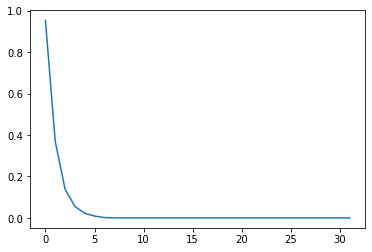

In [286]:
sns.lineplot(x=range(len(d)), y=d)
plt.show()

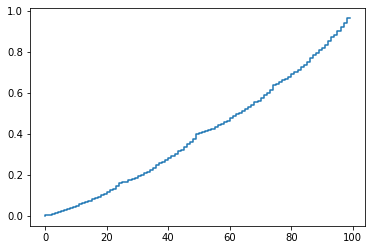

In [287]:
sns.lineplot(x=range(vi.win_state), y=vi.V[:-1], drawstyle='steps-pre')
plt.show()

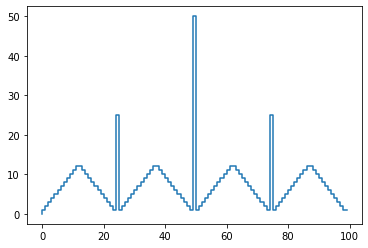

In [288]:
sns.lineplot(x=range(vi.win_state), y=vi.P[:-1], drawstyle='steps-pre')
plt.show()

In [272]:
vi.possible_actions(4), vi.best_action(4)

([0.012910154853401976,
  0.01248944223320605,
  0.012323908232610366,
  0.012365020088434807,
  0.012910154853401976],
 (0, 0.012910154853401976))

In [273]:
[(x,) + vi.best_action(x) for x in range(1, 100)]

[(1, 0, 0.0020656247765443165),
 (2, 0, 0.005164061941360791),
 (3, 0, 0.009225471067793893),
 (4, 0, 0.012910154853401976),
 (5, 0, 0.017385398981324286),
 (6, 0, 0.02306367766948473),
 (7, 0, 0.02781411305627054),
 (8, 0, 0.03227538713350494),
 (9, 0, 0.03768507279536644),
 (10, 0, 0.04346349745331071),
 (11, 0, 0.05035446998069344),
 (12, 0, 0.05765919417371182),
 (13, 0, 0.06523937486592661),
 (14, 0, 0.06953528264067635),
 (15, 0, 0.07443123938879459),
 (16, 0, 0.08068846783376235),
 (17, 0, 0.08661104367721989),
 (18, 0, 0.09421268198841609),
 (19, 0, 0.10314362491955598),
 (20, 0, 0.10865874363327677),
 (21, 0, 0.11596662620633194),
 (22, 0, 0.1258861749517336),
 (23, 0, 0.13357997572379918),
 (24, 0, 0.14414798543427954),
 (25, 0, 0.16000000000000003),
 (26, 0, 0.1630984371648165),
 (27, 0, 0.16774609291204123),
 (28, 0, 0.17383820660169086),
 (29, 0, 0.17936523228010298),
 (30, 0, 0.18607809847198648),
 (31, 0, 0.19459551650422713),
 (32, 0, 0.20172116958440586),
 (33, 0, 0.20

In [264]:
s=16
vi.best_action(s)

(9, 0.08068846783376235)

In [265]:
a=np.array(vi.possible_actions(s))
b=list(enumerate(a))
b.sort(key=lambda x: x[1])
b

[(7, 0.07604303396673953),
 (6, 0.07643256845267987),
 (5, 0.07659933247094884),
 (8, 0.07702442645381478),
 (13, 0.07728137555271752),
 (12, 0.07728137555271754),
 (11, 0.07752967655361107),
 (14, 0.07752967655361107),
 (4, 0.07805901395753781),
 (10, 0.07907758146761745),
 (15, 0.07907758146761745),
 (1, 0.07930316110416472),
 (2, 0.07940624237977226),
 (3, 0.08040107488737835),
 (9, 0.08068846783376234),
 (0, 0.08068846783376235),
 (16, 0.08068846783376235)]

<AxesSubplot:>

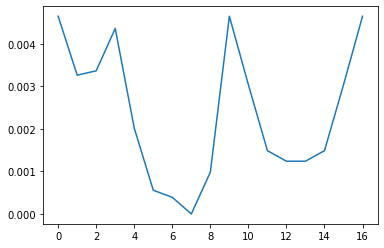

In [266]:
sns.lineplot(x=range(len(a)), y=a-a.min())